In [16]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name:str
    game:Literal["Cricket","Football"]

In [34]:
def play_game(state:TypeDictState):
    print("--Play Game node has been called--")
    return {"name":state['name']+"want to play"}

def cricket(state:TypeDictState):
    print("--Cricket node has been called--")
    return {"name":state['name']+"cricket","game":"Cricket"}


def football(state:TypeDictState):
    print("--Football node has been called--")
    return {"name":state['name']+"football","game":"Football"}

In [35]:
import random
def decide_play(state:TypeDictState)-> Literal["Cricket","Football"]:
    if random.random() < 0.5:
        return "Cricket"
    else:
        return "Football"

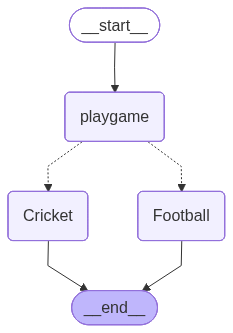

In [36]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypeDictState)

builder.add_node("playgame",play_game)
builder.add_node("Cricket",cricket)
builder.add_node("Football",football)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("Cricket",END)
builder.add_edge("Football",END)

## Add
graph=builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
graph.invoke({"name":"Anay"})

--Play Game node has been called--
--Football node has been called--


{'name': 'Anaywant to playfootball', 'game': 'Football'}

### Dataclasses
Python's dataclasses provide another way to define structured data.

Dataclasses offer a concise syntax for creating classes that are primarily used to store data

In [39]:
### Dataclasses

from dataclasses import dataclass

@dataclass
class DataClassState:
    name:str
    game:Literal["Cricket","Football"]

In [41]:
def play_game(state:DataClassState):
    print("--Play Game node has been called--")
    return {"name":state.name+"want to play"}

def cricket(state:DataClassState):
    print("--Cricket node has been called--")
    return {"name":state.name+"cricket","game":"Cricket"}


def football(state:DataClassState):
    print("--Football node has been called--")
    return {"name":state.name+"football","game":"Football"}

In [42]:
import random
def decide_play(state:DataClassState)-> Literal["Cricket","Football"]:
    if random.random() < 0.5:
        return "Cricket"
    else:
        return "Football"

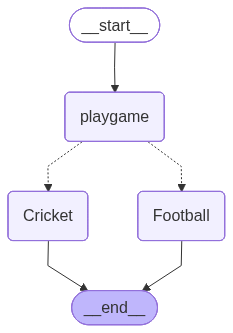

In [43]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(DataClassState)

builder.add_node("playgame",play_game)
builder.add_node("Cricket",cricket)
builder.add_node("Football",football)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("Cricket",END)
builder.add_edge("Football",END)

## Add
graph=builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))

In [57]:
graph.invoke(DataClassState(name="Anay",game="Football"))

--Play Game node has been called--
--Football node has been called--


{'name': 'Anaywant to playfootball', 'game': 'Football'}